In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Optional,Callable

df = pd.read_csv('datasets/dft-road-casualty-statistics-vehicle-2024.csv')

/tmp/ipykernel_1382/2348241605.py:7: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datasets/dft-road-casualty-statistics-vehicle-2024.csv')


In [60]:
def looping_col(func:Callable, df:pd.DataFrame=df) -> pd.DataFrame:
    "I don t want to see too many for loops later"
    output = {col: func(df,col) for col in df.columns}
    return pd.DataFrame(output)


def heatmap_corr(df: pd.DataFrame) -> None:
    corr = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap='coolwarm', annot=False,
                linewidths=0.5, square=True,
                cbar_kws={"shrink": .8})
    plt.title("Correlation Heatmap", fontsize=14, pad=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def histogram(df:pd.DataFrame,col:str) -> None:
    
    s = df[col]

    if str(s.dtype) == 'object':
        return None
    
    n_bins = min([round(1+np.log2(len(s))),s.nunique()]) # sturges' Rule

    plt.figure(figsize=(10, 8))
    sns.histplot(df[col].dropna(), bins=n_bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# to write something about NA values, that here there arent but it different context we should take them into consideration when computing uniqueness etc
def summary_df(df:pd.DataFrame, col:str) -> int:
    s = df[col]

    stats = {
        "count": s.count(),
        "missing": s.isna().sum(),
        "missing_pct": s.isna().mean()*100,
        "nunique": s.nunique(),
        'uniqueness_ratio': s.nunique()/len(s),
        "dtype": str(s.dtype),
        'most_freq': s.value_counts(ascending=False).index[0],
        '%_most_freq': round((s.value_counts(ascending=False).iloc[0]/s.count())*100,2)
    }

    return stats


looping_col(summary_df)


,collision_index,collision_year,collision_ref_no,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre_historic,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,lsoa_of_driver,escooter_flag,driver_distance_banding
count,183514,183514,183514,183514,183514,183514,183514,183514,183514,183514,...,183514,183514,183514,183514,183514,183514,183514,183514,183514,183514
missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
missing_pct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nunique,100927,1,100927,33,22,8,20,19,11,11,...,100,12,949,9,78,731,11,33464,2,6
uniqueness_ratio,0.549969,0.000005,0.549969,0.00018,0.00012,0.000044,0.000109,0.000104,0.00006,0.00006,...,0.000545,0.000065,0.005171,0.000049,0.000425,0.003983,0.00006,0.182351,0.000011,0.000033
dtype,object,int64,object,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,object,int64,object,int64,int64
most_freq,2024471416027,2024,471416027,1,9,0,-1,19,1,1,...,-1,6,-1,1,-1,-1,-1,-1,0,1
%_most_freq,0.01,100.0,0.01,54.95,68.53,94.81,60.25,50.44,15.25,14.69,...,15.6,19.18,29.64,38.31,27.49,17.86,22.08,25.14,99.28,40.96


In [61]:
round(1+np.log2(len(df)))

18

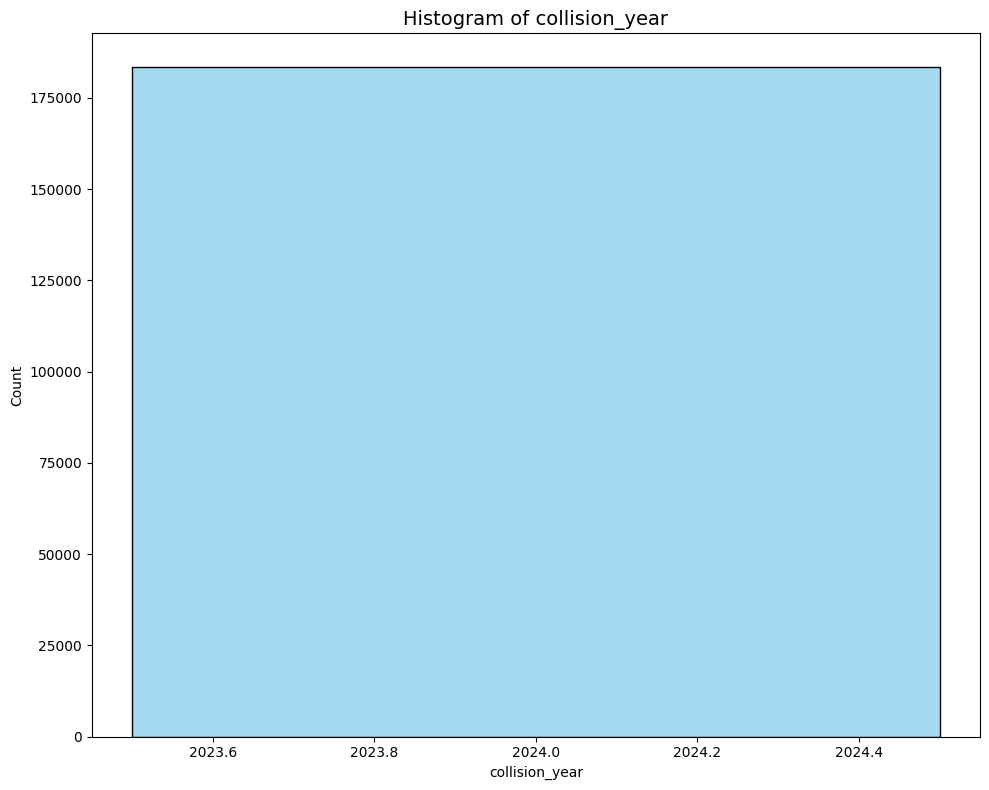

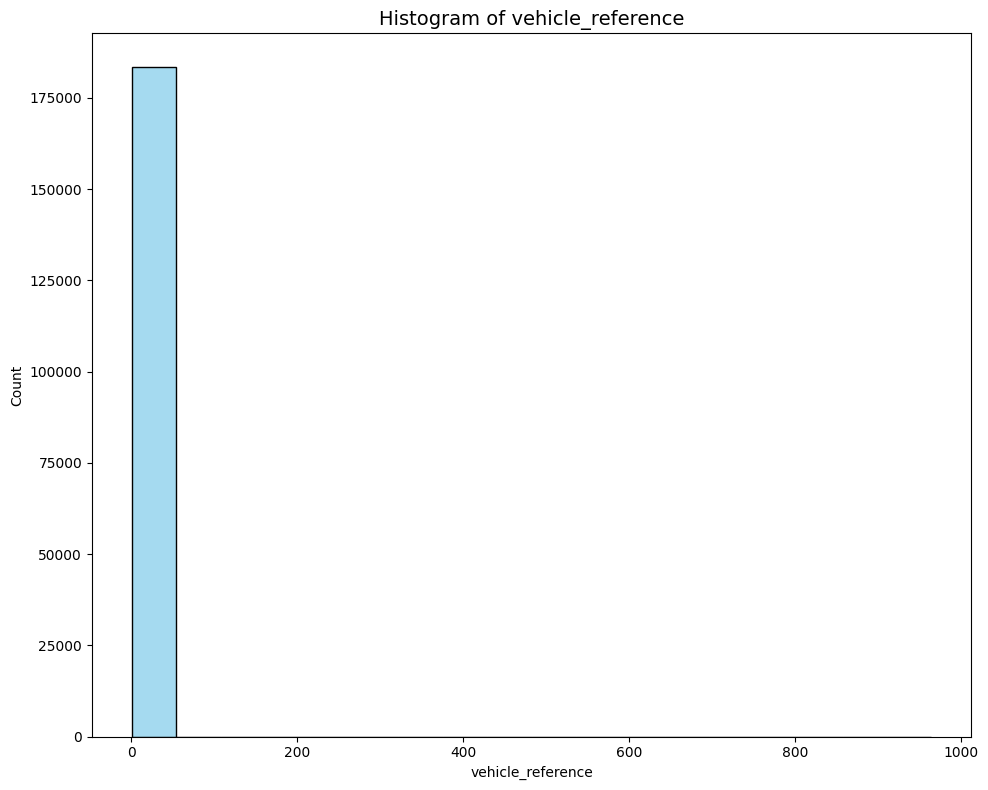

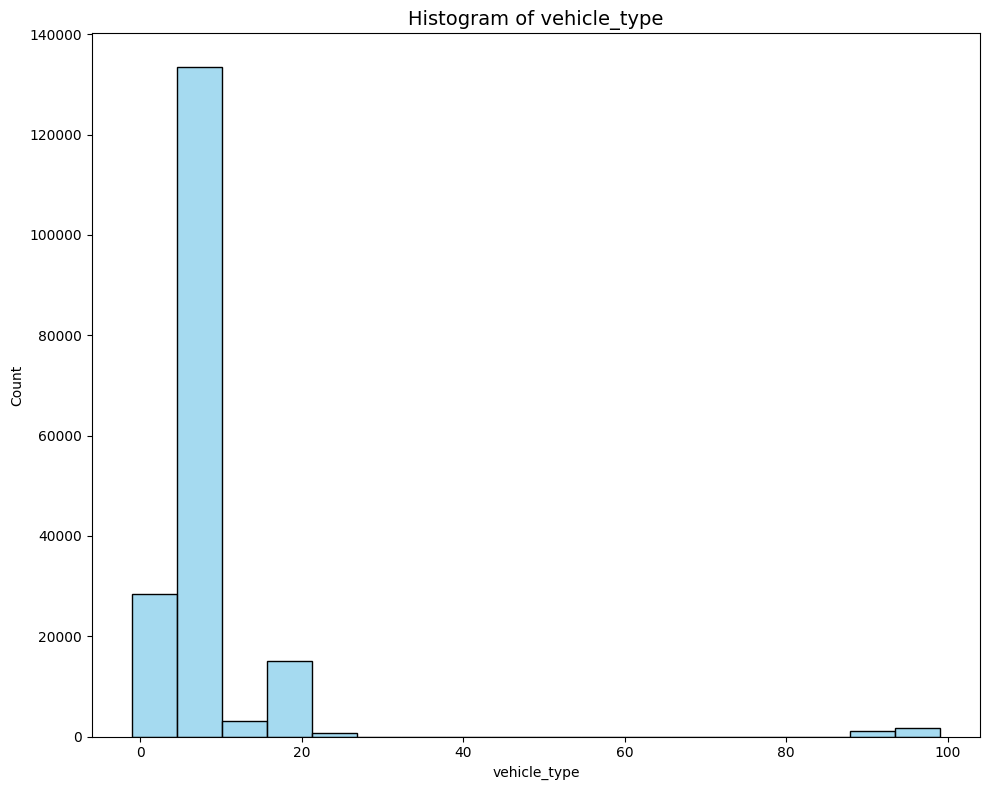

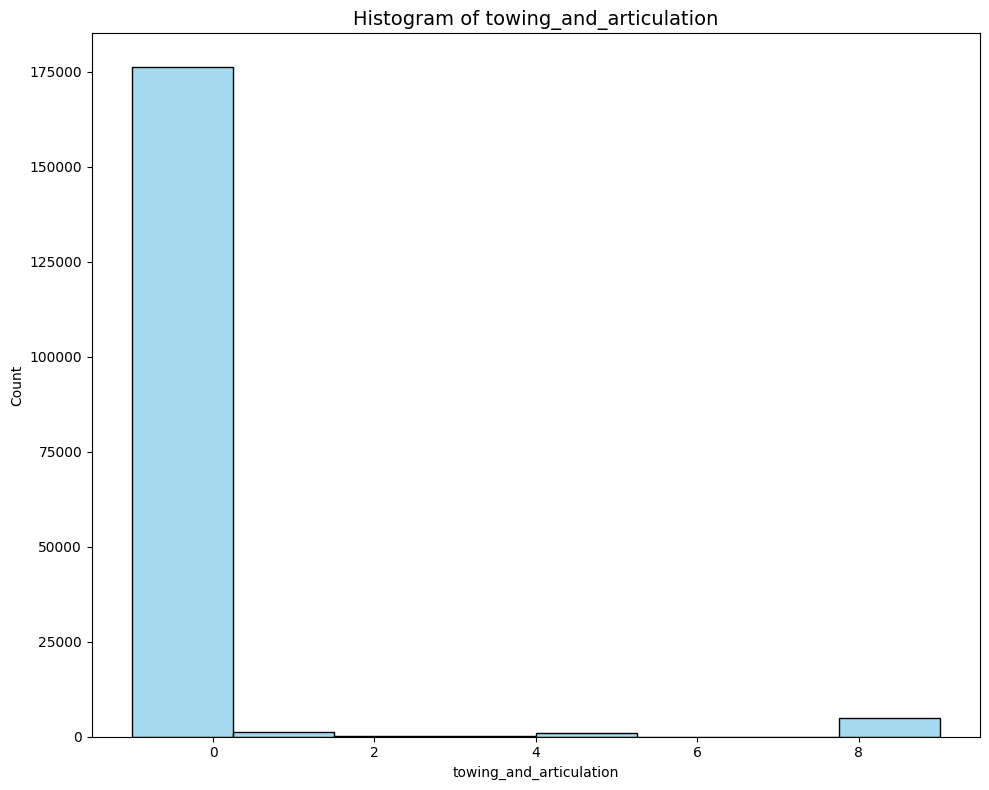

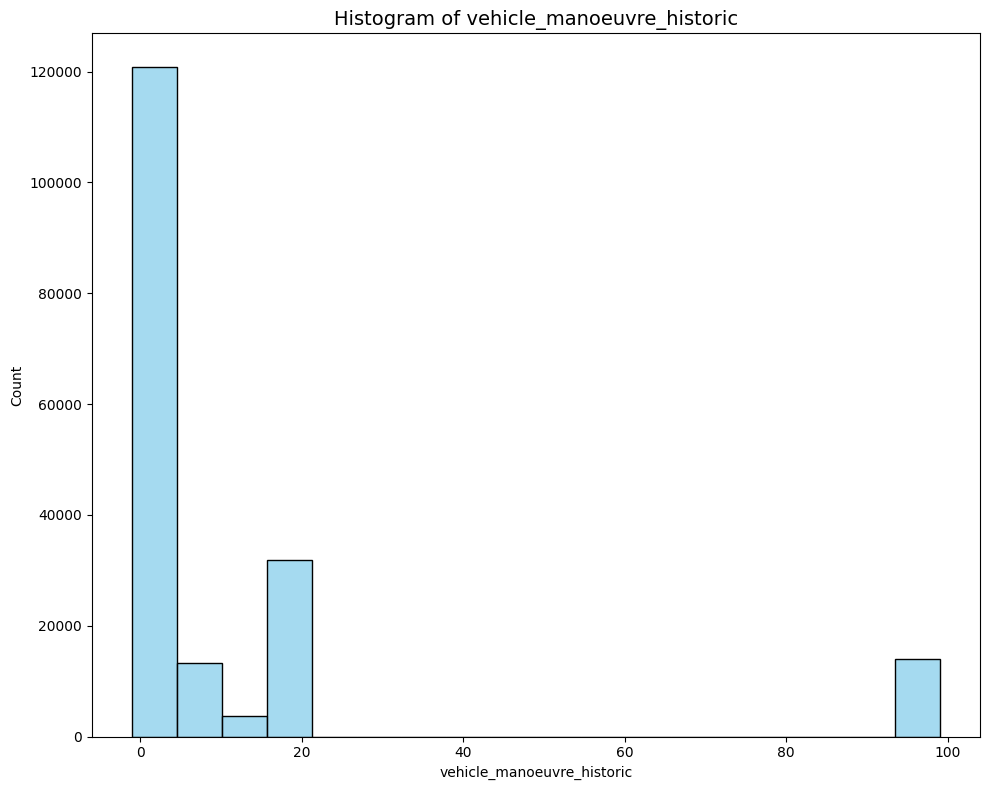

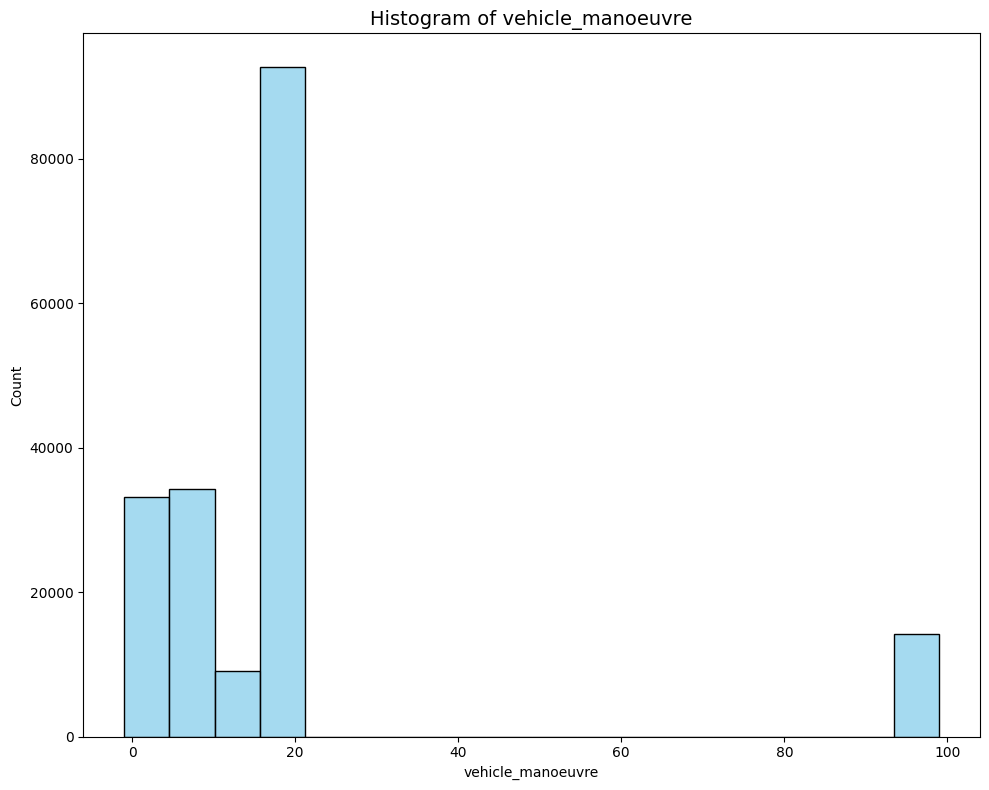

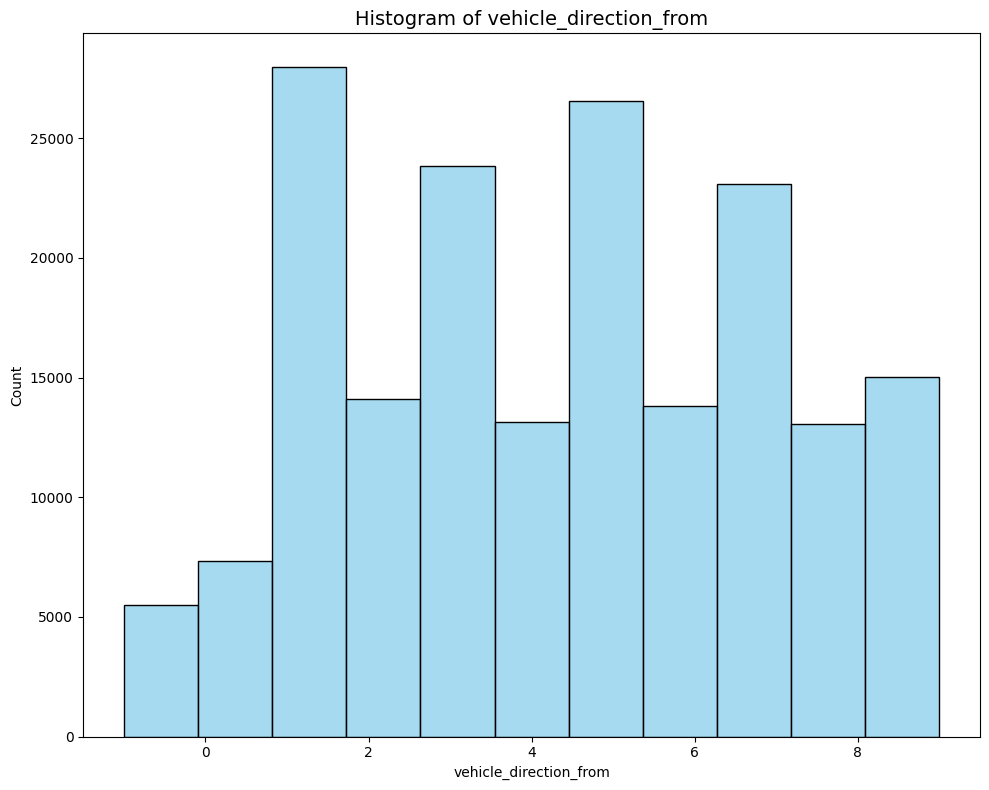

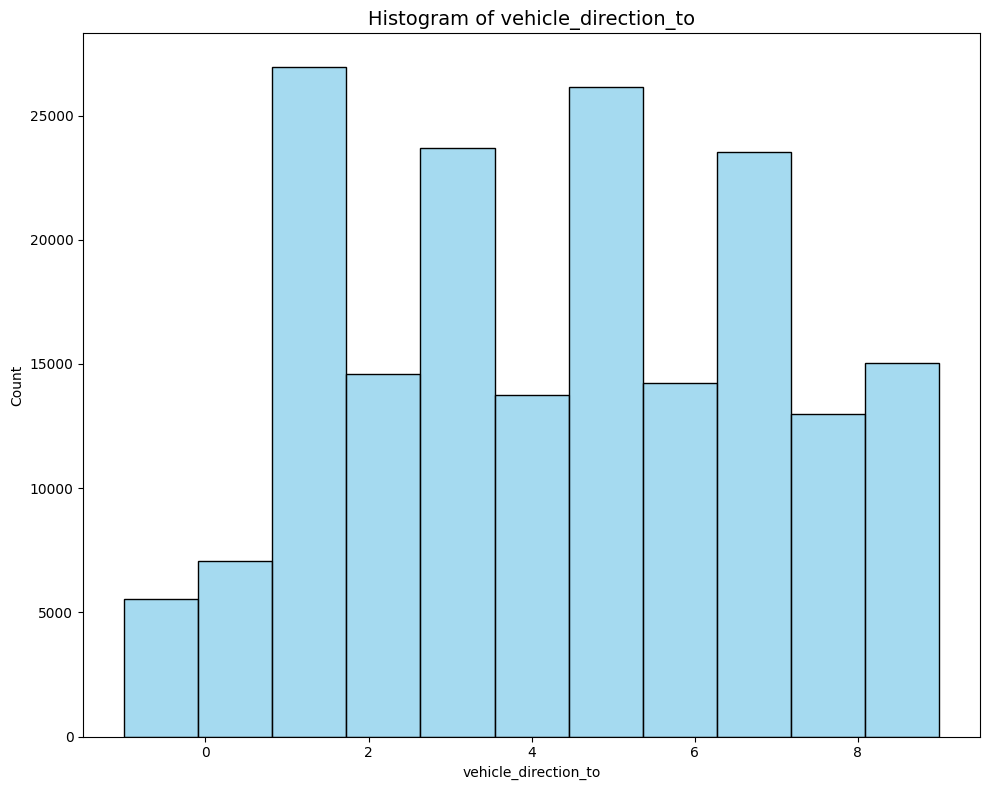

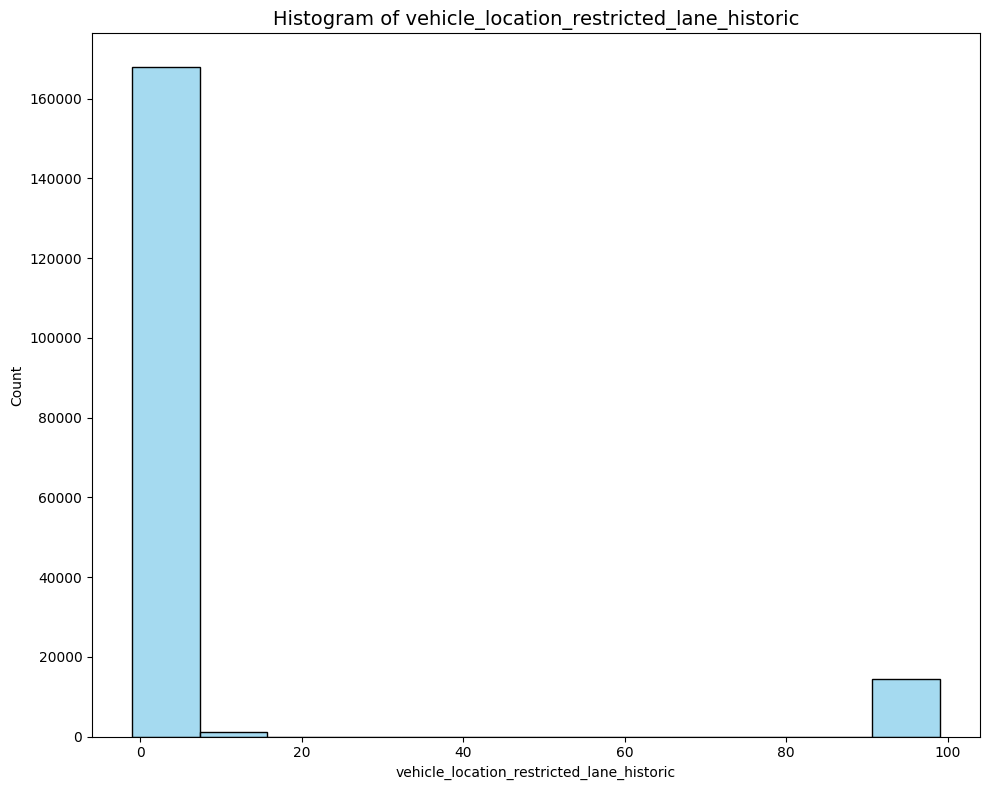

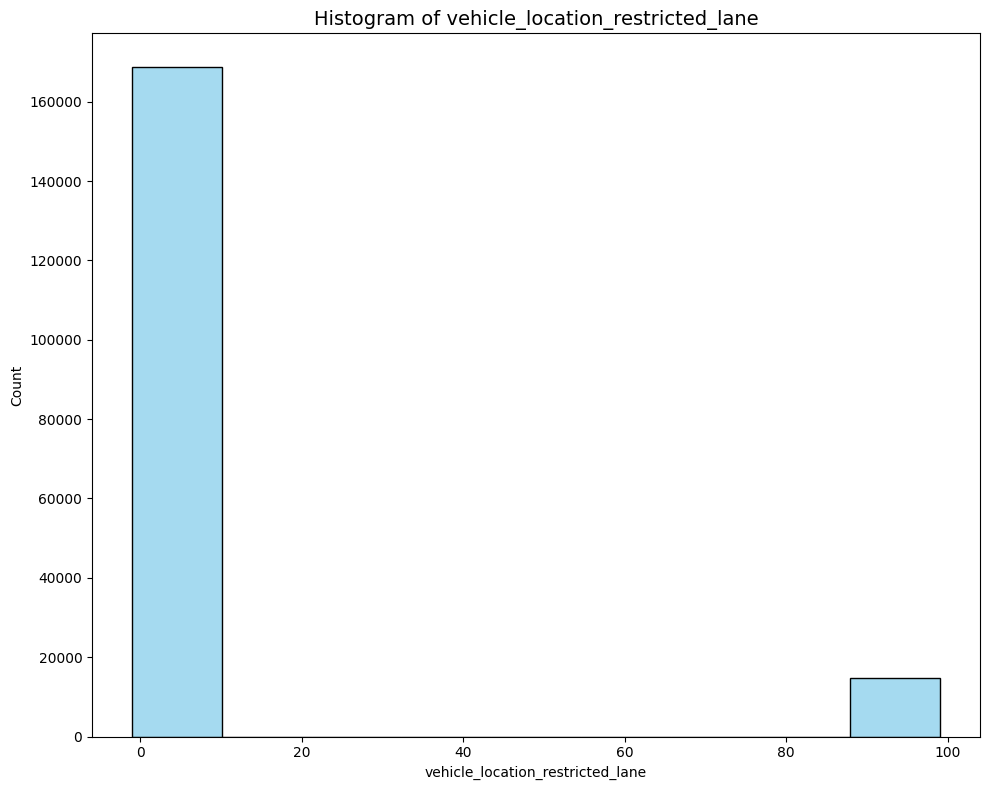

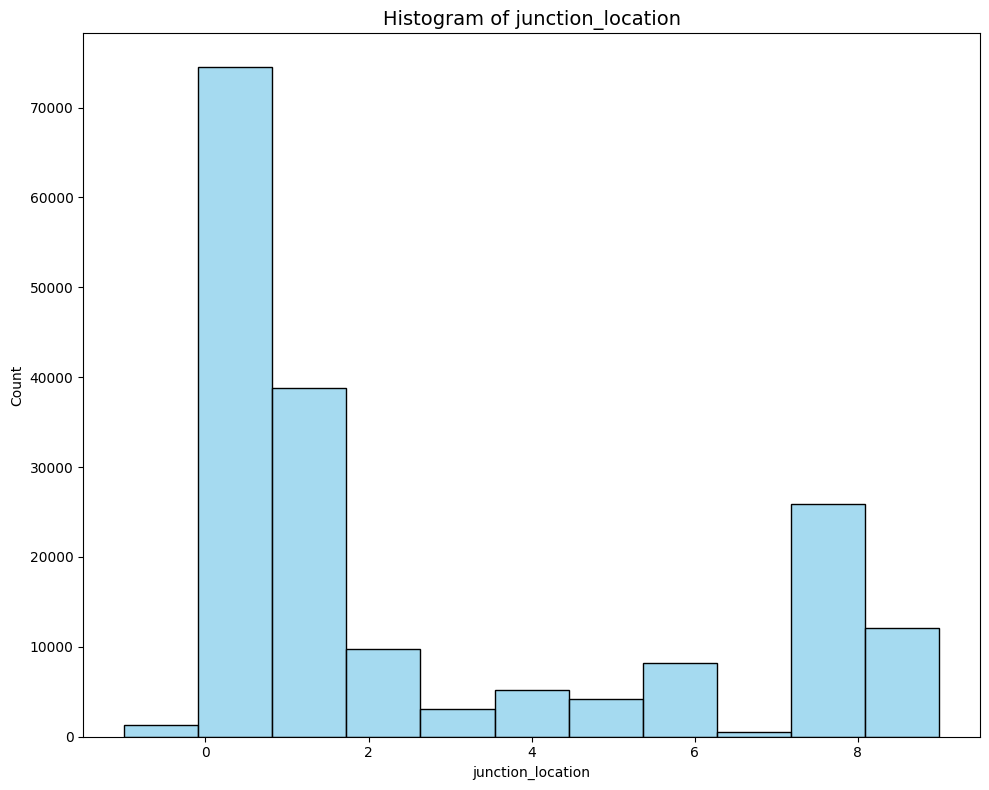

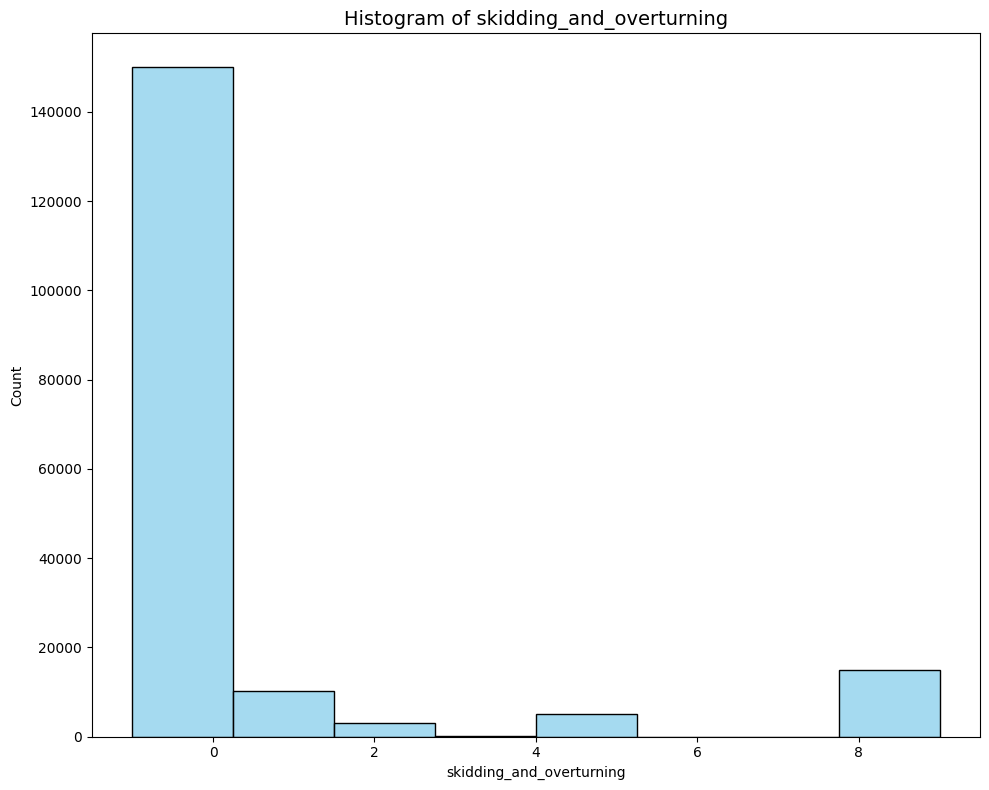

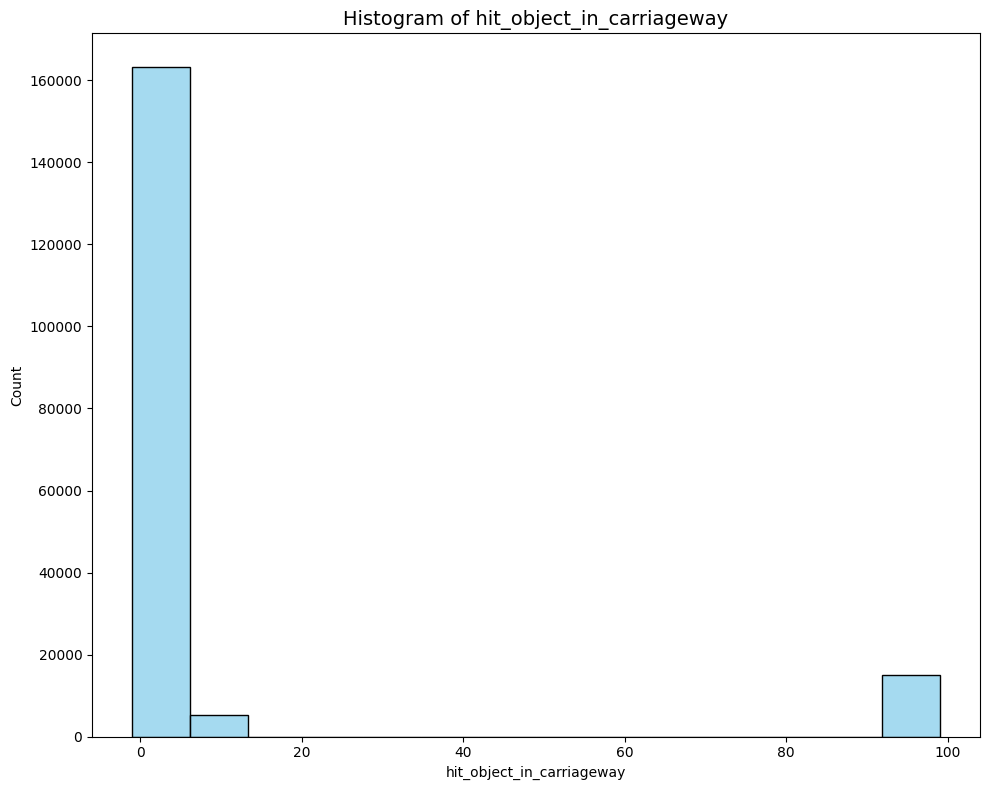

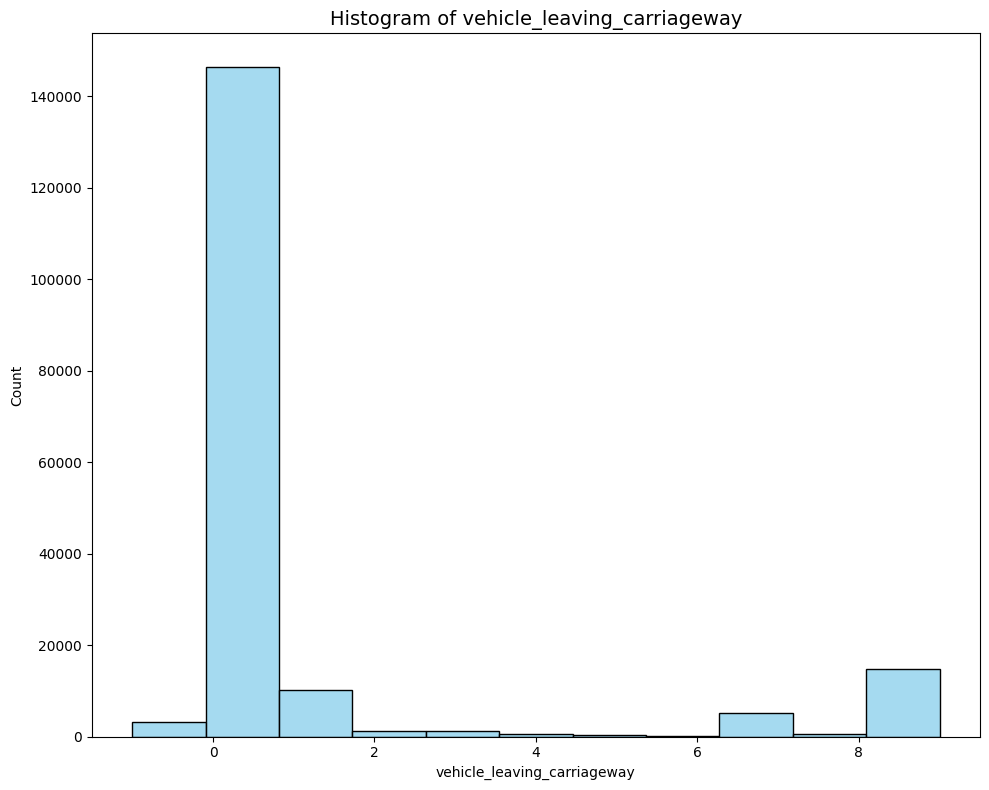

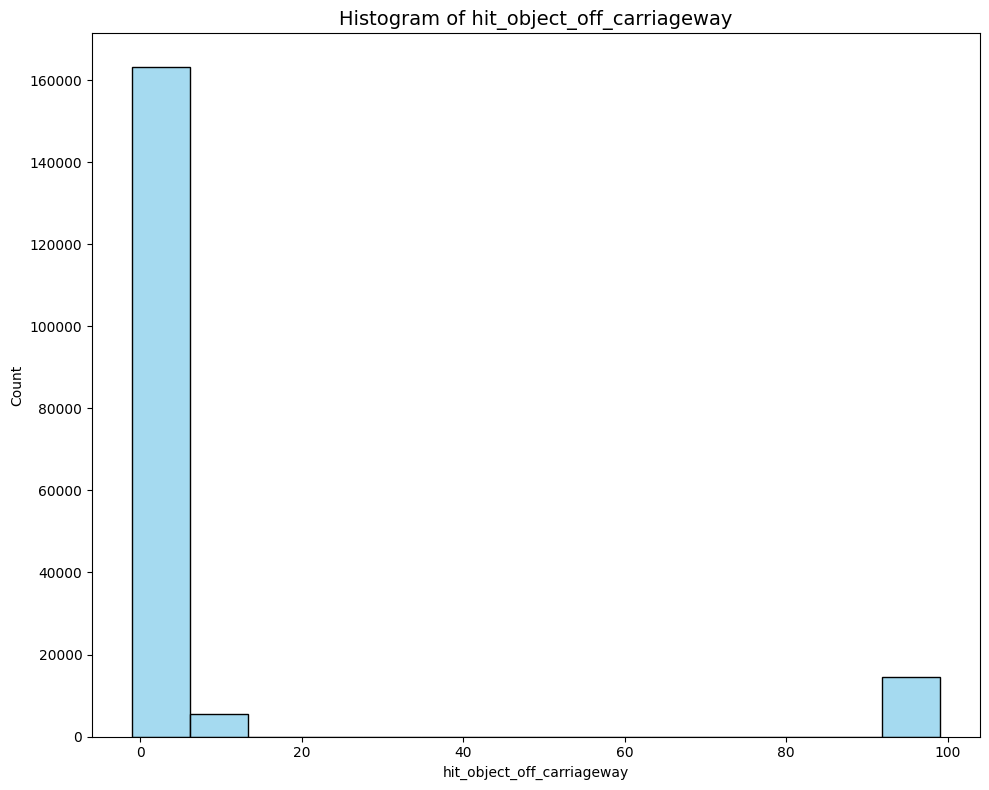

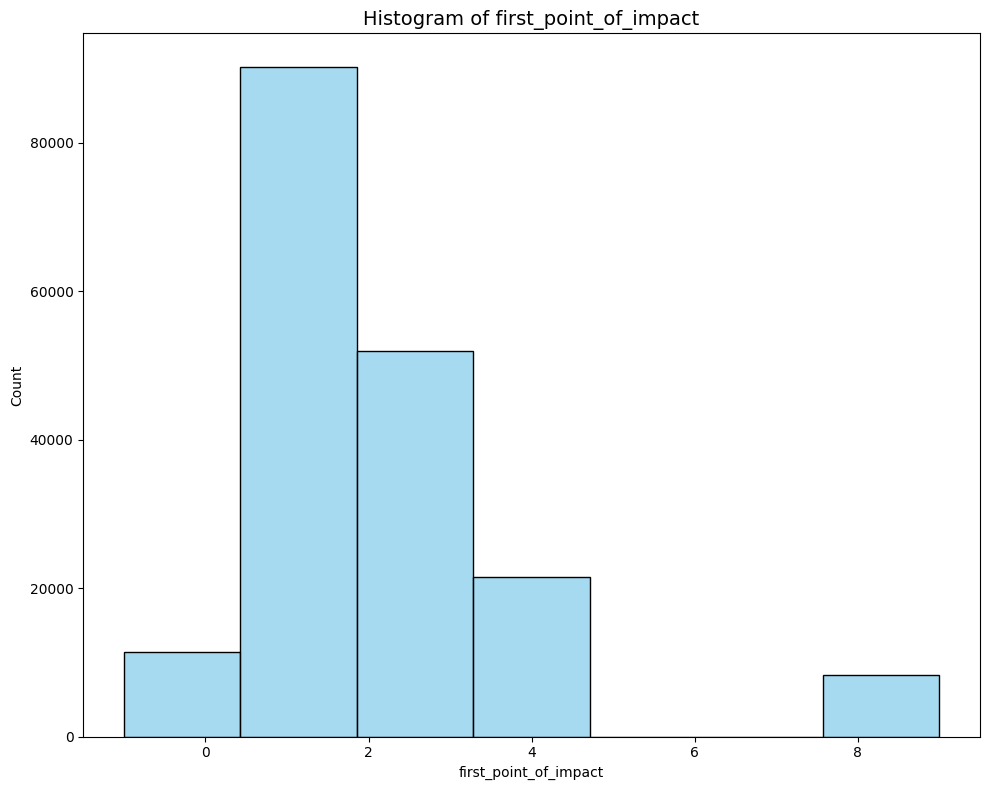

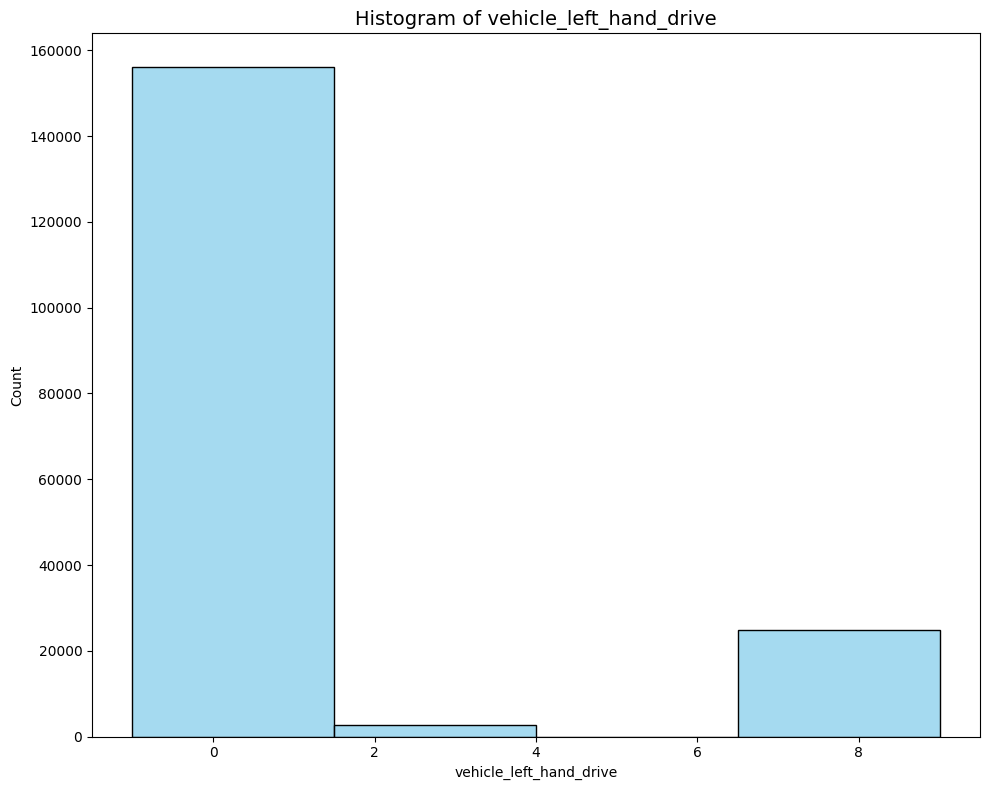

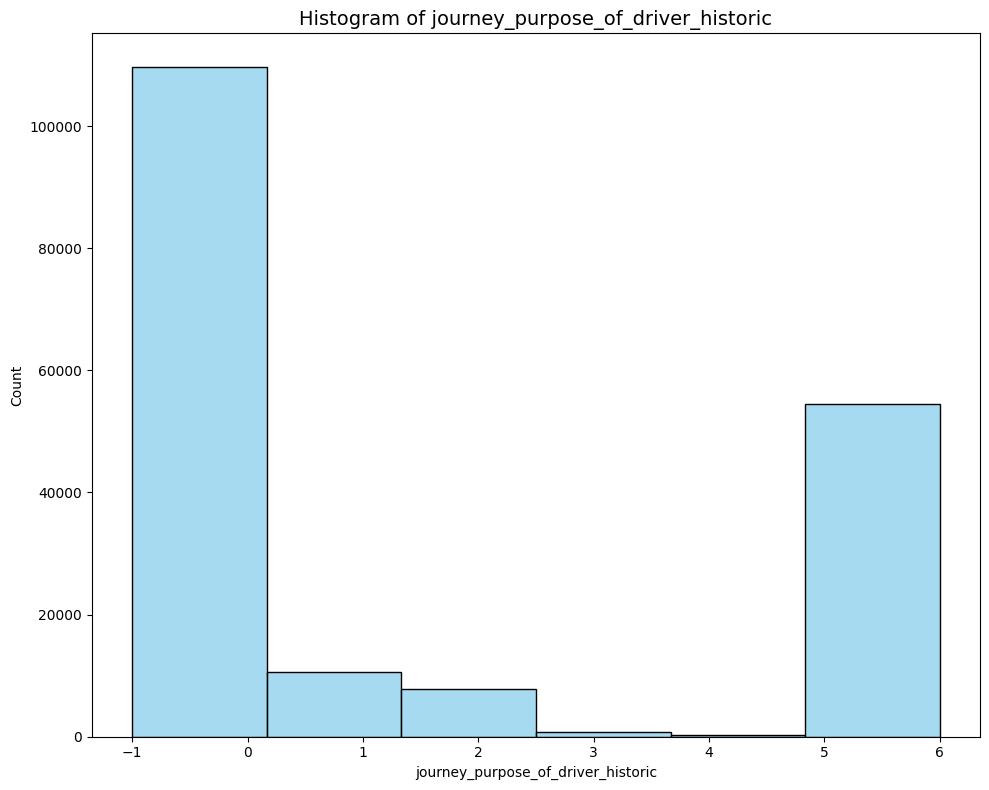

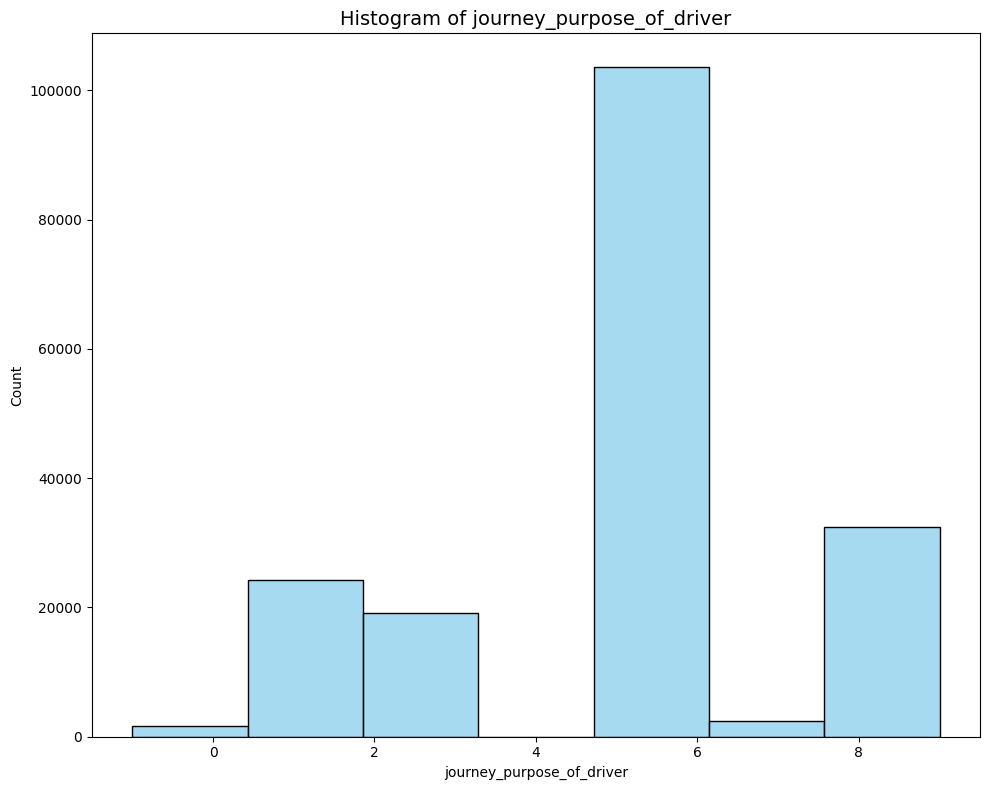

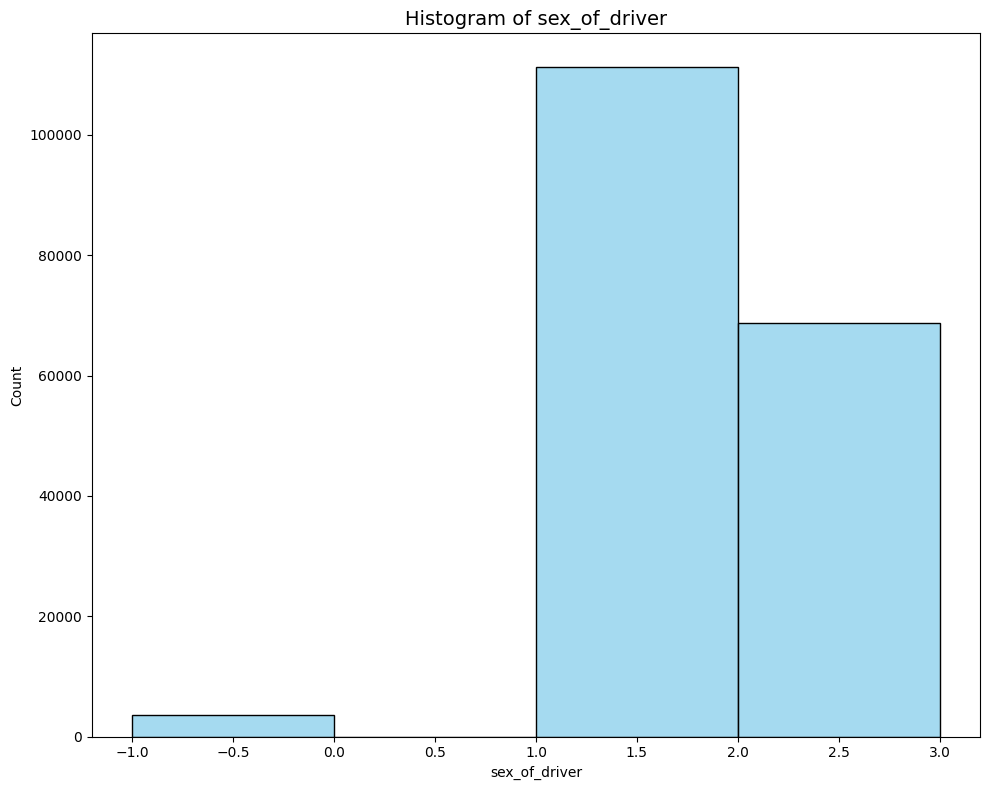

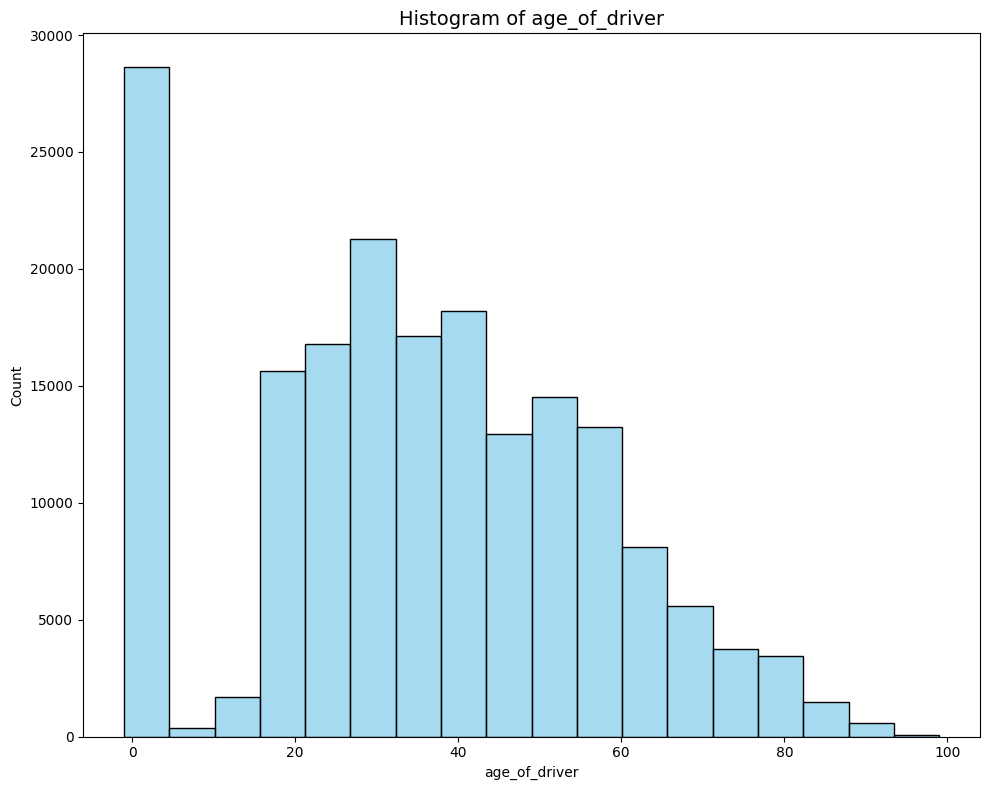

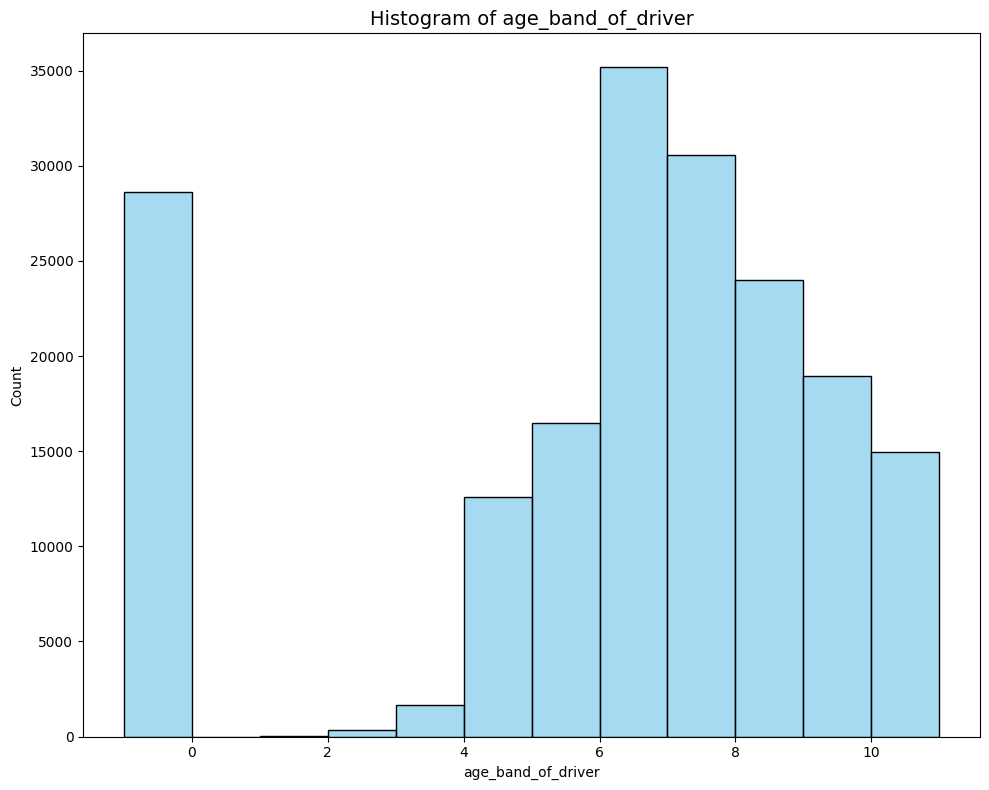

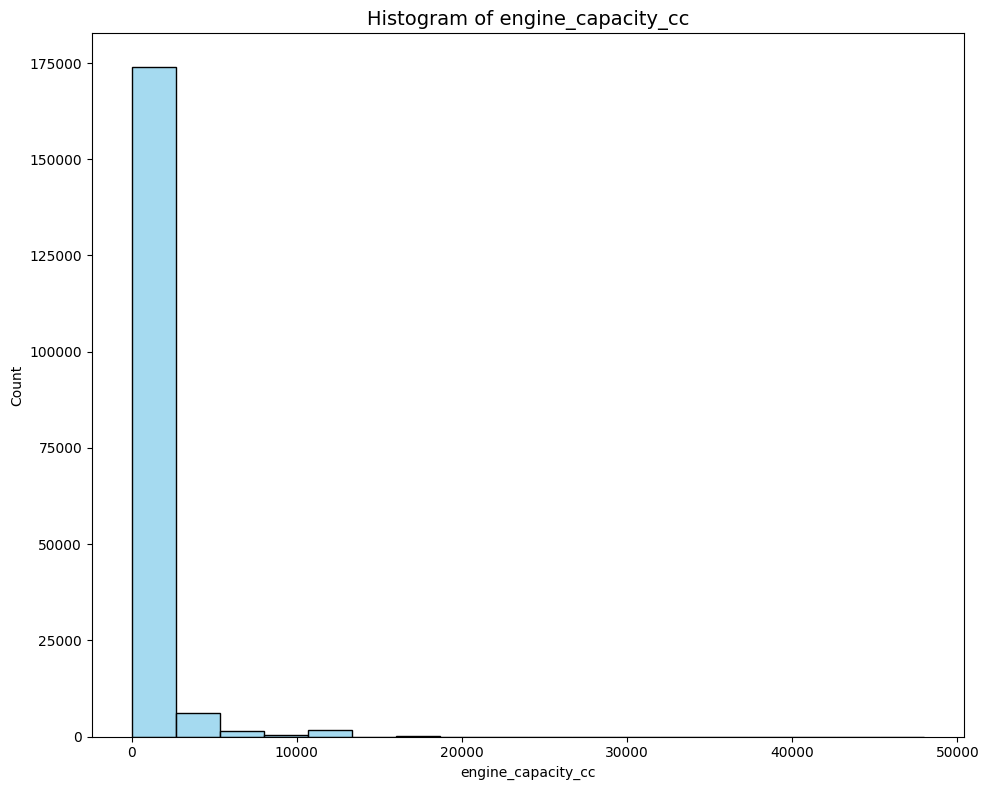

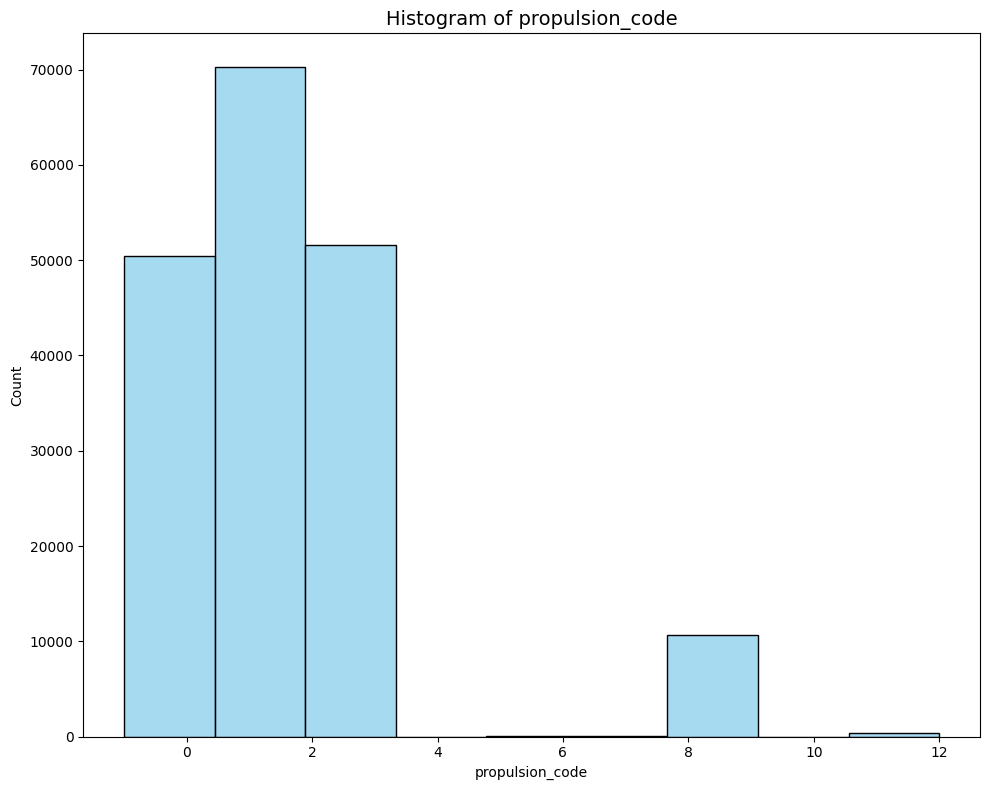

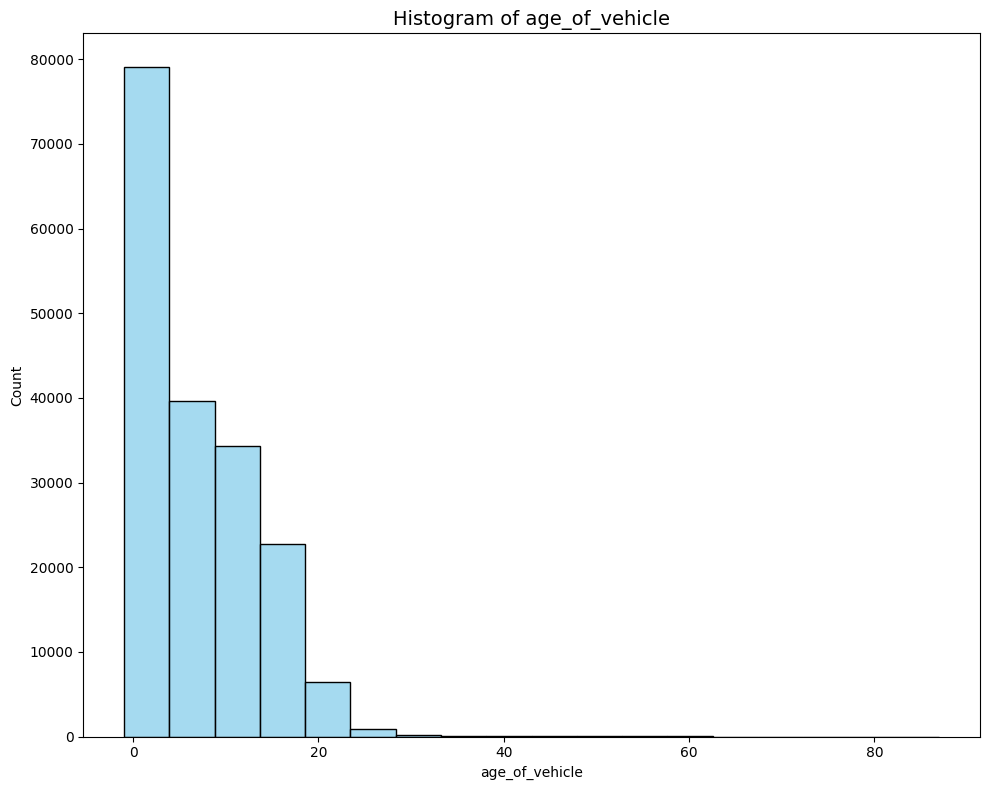

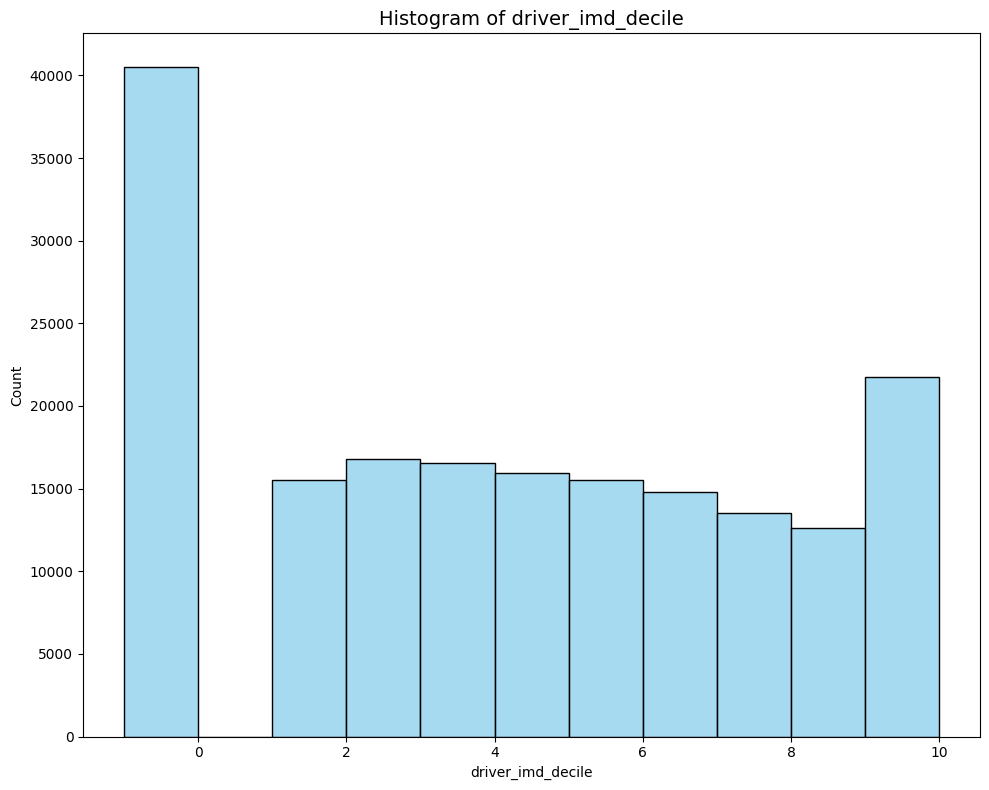

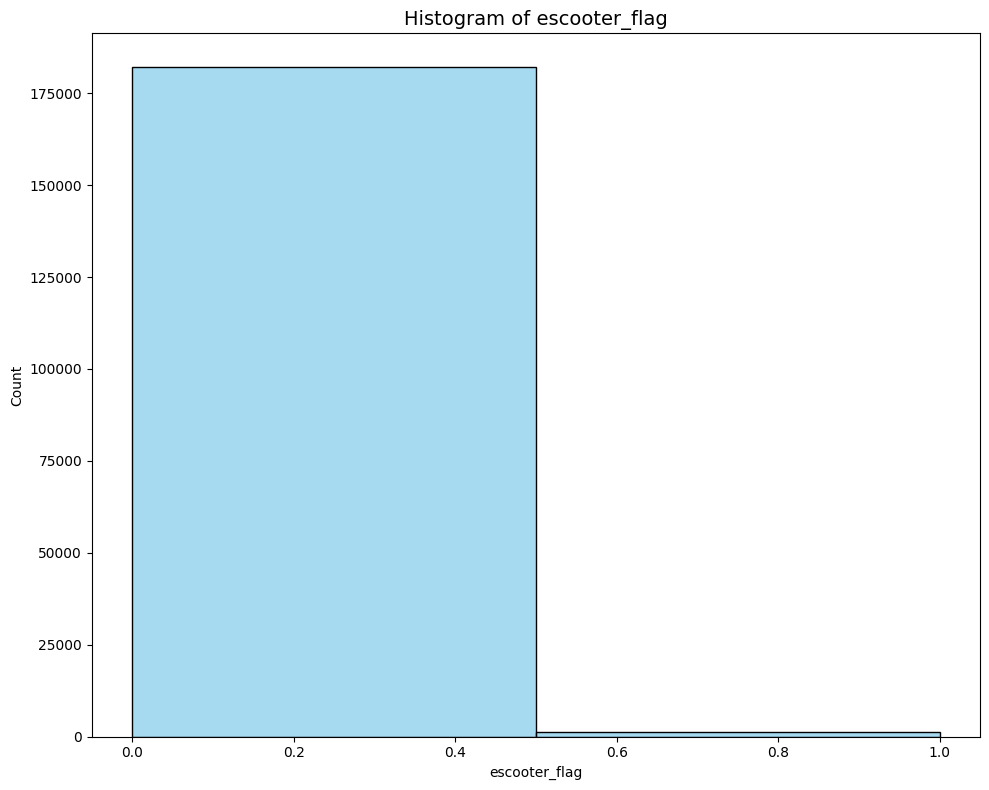

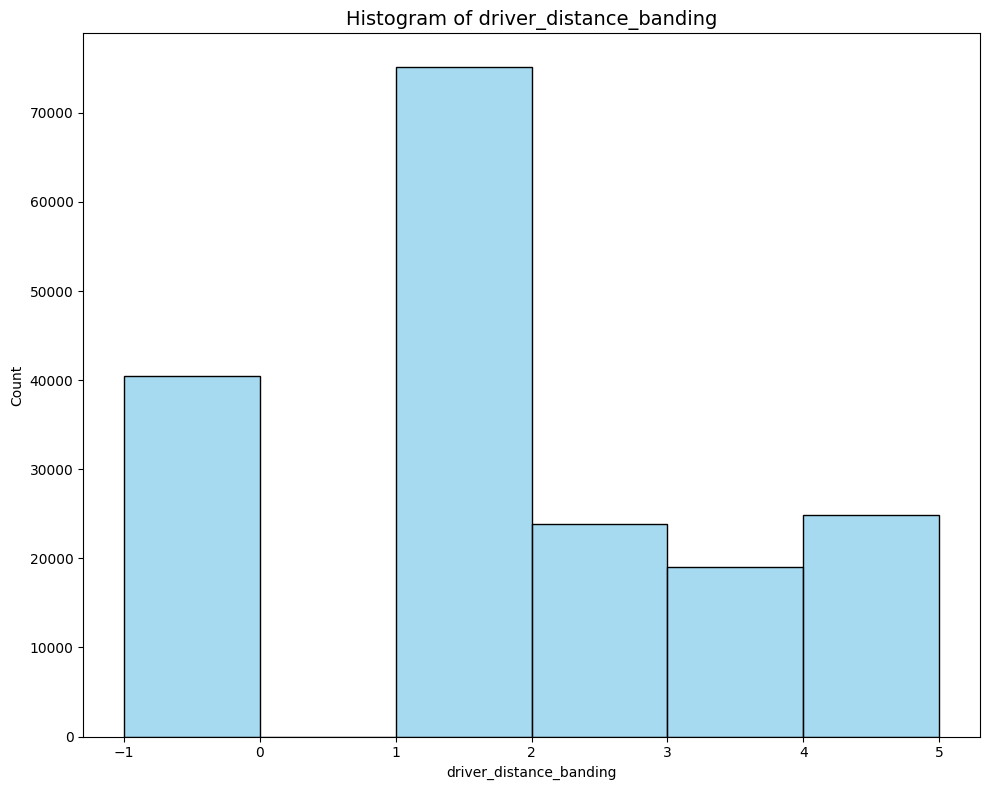

ValueError: If using all scalar values, you must pass an index

In [62]:
looping_col(histogram)

In [ ]:
df.collision_index.value_counts(ascending=False)

collision_index
2024471416027    26
2024461393694    20
2024543395024    16
2024201532611    13
2024461401096    13
                 ..
2024332400746     1
2024451529872     1
2024471442399     1
2024501475486     1
2024221530823     1
Name: count, Length: 100927, dtype: int64

In [ ]:
print(f'The dataset has: {df.shape[0]} rows and {df.shape[1]} columns')

print('\nGet overall description:')

df.describe(include='all')

The dataset has: 183514 rows and 32 columns

Get overall description:


,collision_index,collision_year,collision_ref_no,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre_historic,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,lsoa_of_driver,escooter_flag,driver_distance_banding
count,183514,183514.0,183514,183514.000000,183514.000000,183514.000000,183514.000000,183514.000000,183514.000000,183514.000000,...,183514.000000,183514.000000,183514.000000,183514.000000,183514.000000,183514.0,183514.000000,183514,183514.000000,183514.000000
unique,100927,NaN,100927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,731.0,NaN,33464,NaN,NaN
top,2024471416027,NaN,471416027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,-1,NaN,NaN
freq,26,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32768.0,NaN,46131,NaN,NaN
mean,NaN,2024.0,NaN,1.550863,10.013525,0.256046,10.988001,19.735742,4.315349,4.340394,...,34.828967,5.743475,1239.141477,1.183833,6.186591,NaN,3.758253,NaN,0.007204,1.332721
std,NaN,0.0,NaN,2.497009,11.388826,1.483747,26.228399,23.940357,2.804361,2.794030,...,21.959951,3.361101,1546.934956,2.122329,6.767983,NaN,3.523991,NaN,0.084569,1.656502
min,NaN,2024.0,NaN,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,-1.000000,NaN,0.000000,-1.000000
25%,NaN,2024.0,NaN,1.000000,9.000000,0.000000,-1.000000,7.000000,2.000000,2.000000,...,21.000000,5.000000,-1.000000,-1.000000,-1.000000,NaN,1.000000,NaN,0.000000,1.000000
50%,NaN,2024.0,NaN,1.000000,9.000000,0.000000,-1.000000,19.000000,4.000000,5.000000,...,35.000000,6.000000,1242.000000,1.000000,5.000000,NaN,4.000000,NaN,0.000000,1.000000
75%,NaN,2024.0,NaN,2.000000,9.000000,0.000000,15.000000,19.000000,7.000000,7.000000,...,51.000000,8.000000,1796.000000,2.000000,11.000000,NaN,7.000000,NaN,0.000000,2.000000
